##### 
# Model Evaluation (Workbook)

### ITCS 5156
### Minwoo "Jake" Lee

<br/>
<font color="blue"><b>

NAME: Zachary Hamilton

</b> </font>

# Goal

The goal of this activity is to evaluate the machine learning models for classification and regression problems. We will use the [Air Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Air+Quality) and [Abalone dataset](https://archive.ics.uci.edu/ml/datasets/Abalone). Follow the TODO titles and comments to finish the activity! 

# Agenda

* Data Preparation
* Data visualization 
* Classification Evaluation
* Regression Evaluation
* Cross Validation
  
  

# Tables of TODO's


1. [TODO1 (5 points)](#TODO1) 
2. [TODO2 (5 points)](#TODO2) 
3. [TODO3 (5 points)](#TODO3) 
4. [TODO4 (5 points)](#TODO4)  
5. [TODO5 (10 points)](#TODO5) 
6. [TODO6 (5 points)](#TODO6) 
7. [TODO7 (5 points)](#TODO7) 
8. [TODO8 (5 points)](#TODO8) 
9. [TODO9 (10 points)](#TODO9) 
10. [TODO10 (10 points)](#TODO10) 
12. [TODO11 (10 points)](#TODO11) 
13. [TODO12 (10 points)](#TODO12) 
13. [TODO13 (8 points)](#TODO13) 
13. [TODO14 (5 points)](#TODO14) 
18. [Feedback (2 points)](#TODO18) 

Well, let us start the lab with importing the common libraries first. 

In [1]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

# Datasets 

Let us prepare two datasets from [UCI Data Repository](https://archive.ics.uci.edu/ml/index.html), one for classification and the other for regression.  For classification, we will use [Air Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Air+Quality). We use [Abalone dataset](https://archive.ics.uci.edu/ml/datasets/Abalone) for regression. 

### Abalone Dataset 

The dataset we'll be using this week is the Abalone Dataset (pronounced ab·​a·​lo·​ne). For those that don't know, abalone are marine snails. The original goal of this data is to predict the age of a given abalone. Typically, this is done by counting the number of rings the shell contains (much like tree ring counting). However, counting the rings of an abalone shell is expensive (see description below). Thus, the authors of the data wish to use other features to predict age. 

**It turns out that predicting age is actually quite hard, so we'll focus on predicting other features such as sex. More on this later...**

You can find the detailed description and relevant papers from the [link](https://archive.ics.uci.edu/ml/datasets/Abalone). 
You can directly download the file from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data).

### Air Quality Dataset

This data contains responses  of a gas multisensor device deployed on the field in a n Italian city. Hourly averaged CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) along with temperature, humidity are included in the dataset. You can directly download the file from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip). As the file is zipped, you need to unzip to use the csv file. 


<table>
    <tr>
        <td><img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large174.jpg" width=200 /></td>
        <td><img src="https://foodtank.com/wp-content/uploads/2020/04/COVID-19-Relief_Small-Farms-.jpg" width=300  /></td>
    </tr>
</table>    


In [2]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  187k  100  187k    0     0   388k      0 --:--:-- --:--:-- --:--:--  389k


In [3]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1507k  100 1507k    0     0  2123k      0 --:--:-- --:--:-- --:--:-- 2123k


In [4]:
!unzip AirQualityUCI.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


### [IMPORTANT] Checking AirQualityUCI.csv ... 


Before start, open your favorite editor and read the downloaded csv file. You can notice there are commas the between some values which are the typos for decimal point. Replace all the commas to period and move on the following steps.  

Now, let us load the two datasets into memory. 

<div id="TODO1"></div>

### TODO1 (5 points)
1. Using Pandas DataFrame, read the two csv files and store them to `df_air` and `df_abalone` respectively.  
2. Print the summary using `describe`. 

NOTE: check the file and see if the file is formatted as before. If not, you need to use proper options to read the file correctly. Assign proper header names so you can use it when indexing.

In [5]:
df_air= pd.read_csv('./AirQualityUCI.csv',delimiter=";")
df_abalone=pd.read_csv('./abalone.data',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
df_air.describe()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [6]:
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<div id="TODO2"></div>

### TODO2 (5 points)

1. Now it's time to properly clean the datasets. Check the data and see if you need data cleaning. Then, decide what cleaning method to use. You can refer Data Preprocessing lab if you needed.  

In [7]:
print(df_air.shape)

# TODO: Add your cleaning codes here
#.      The output below is my example but you don't need to make it exactly same.

df_air=df_air.dropna(how='all',axis=1)
df_air=df_air.dropna()

print(df_air.shape)
df_air

(9471, 17)
(9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [8]:
# data cleaning for Abalone dataset 


print(df_abalone.shape)

# TODO: Add your cleaning codes here
#.      The output below is my example but you don't need to make it exactly same.

df_abalone=df_abalone.dropna()


print(df_abalone.shape)
df_air

(4177, 9)
(4177, 9)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


<div id="TODO3"></div>


Last week, we learned the skewness of data. Let us see if the data samples are skewed or not.

### TODO3 (5 points)

1. Print skewness of each feature for both air quality and parkinsons datasets. 
2. Answer to the question. 

In [9]:
# TODO: skewness of Abalone

df_abalone.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [10]:
# TODO: skewness of Air Quality

df_air.skew()

CO(GT)          -1.666180
PT08.S1(CO)     -1.721503
NMHC(GT)         4.075784
C6H6(GT)        -4.508763
PT08.S2(NMHC)   -0.793435
NOx(GT)          0.825232
PT08.S3(NOx)    -0.384760
NO2(GT)         -1.225630
PT08.S4(NO2)    -1.244110
PT08.S5(O3)     -0.034662
T               -4.445467
RH              -3.932407
AH              -4.754570
dtype: float64

`TODO3.2` Which dataset (Air Quality or Parkinsons) have more features that are positively skewed? 

`ANSWER` Abalone is more positively skewed

## Visualization
Now it's time to do some quick visualization to see how the data look like.




<div id="TODO4"></div>

### TODO4 (5 points)

1. Using the Pandas `scatter_matrix()` or Seaborn pairplot, create a scatter plot using the all the features from the `df_abalone` and `df_air` dataframe.

<font color="red"><b>WARNING: THIS CODE CAN TAKE A LONG TIME TO RUN! </b></font>   
As it compares the all the pairs, it may take long depending on your computing power. Once you get the figure, running this cell multiple times is not a good idea.    

In [11]:
df_abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [12]:
# you may need numerical encoding for the colored scatter plot

df_abalone_num=copy(df_abalone)
df_abalone_num.Sex=pd.factorize(df_abalone_num.Sex)[0]
df_abalone_num.Sex

0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 4177, dtype: int64

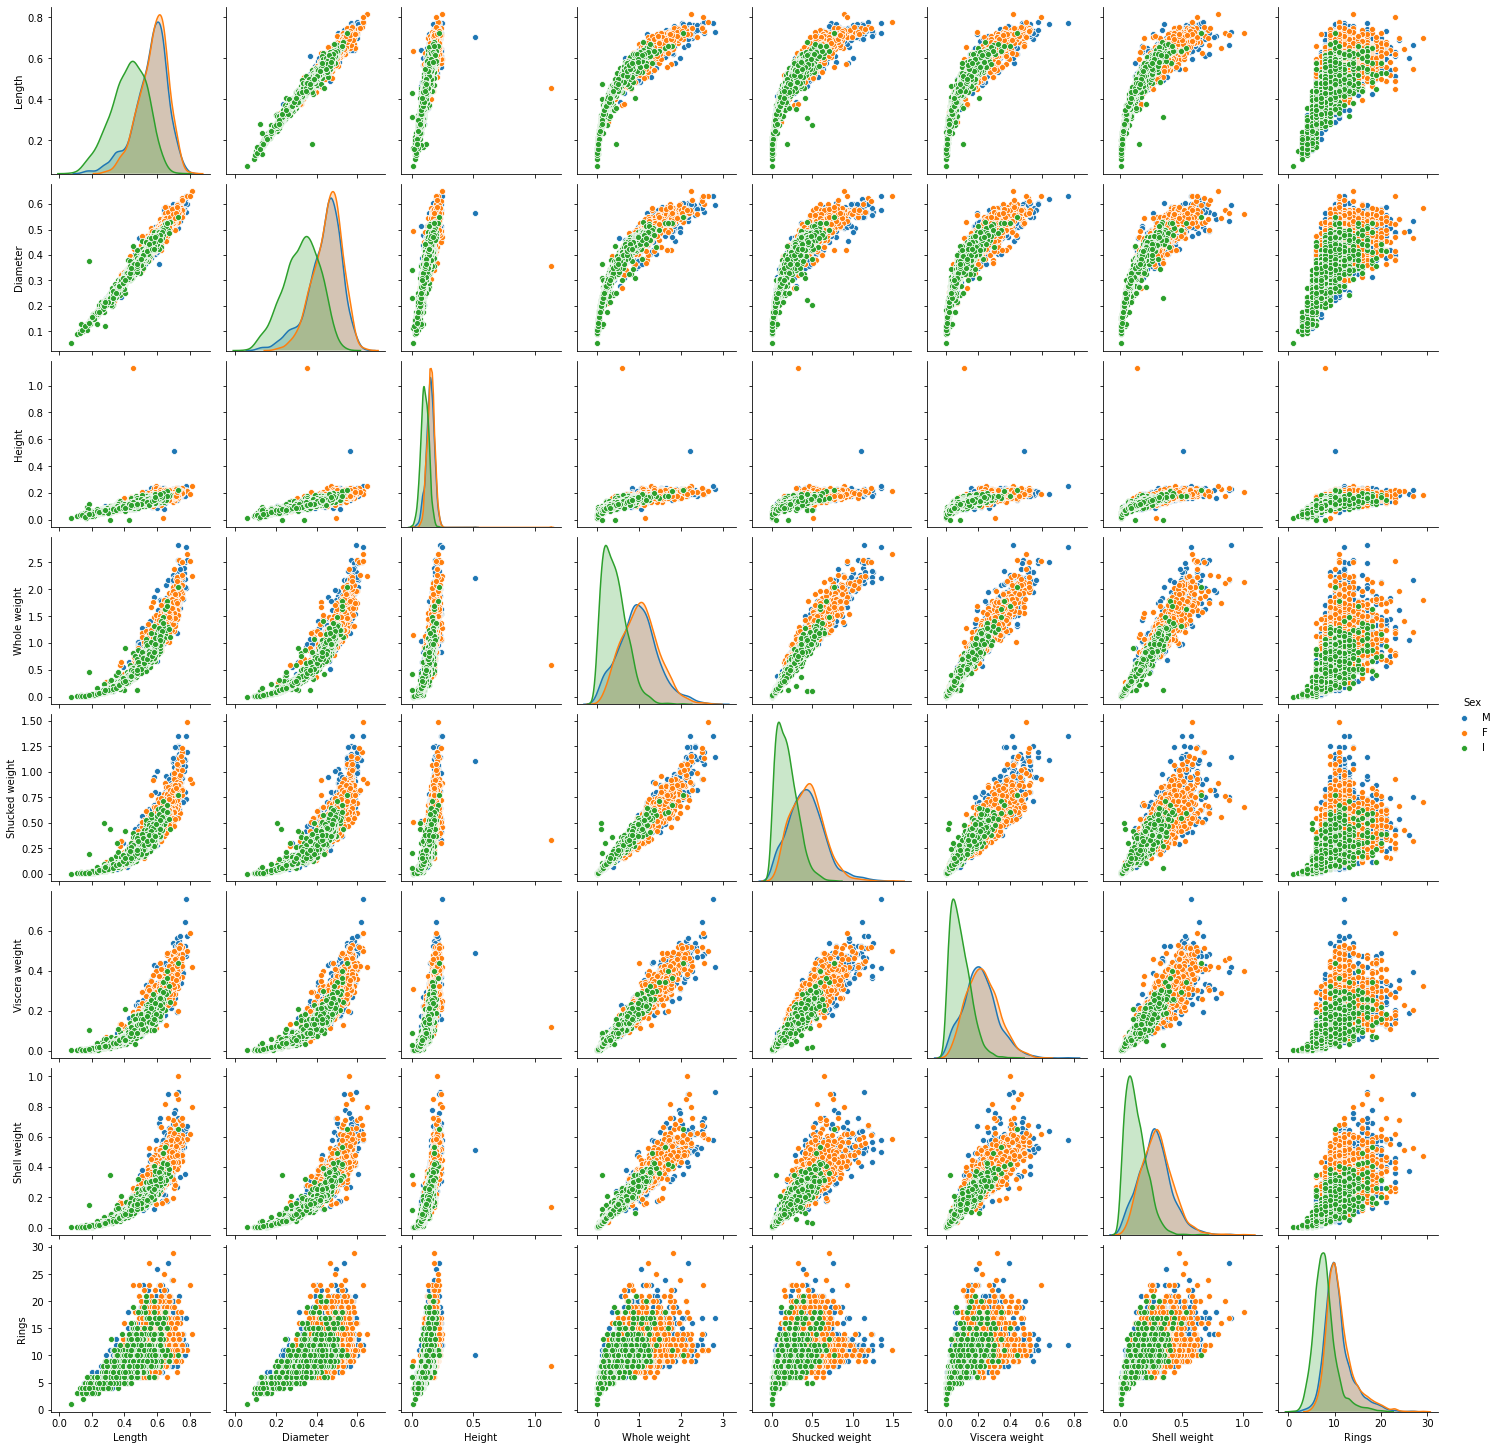

In [13]:
# pairplot of abalone (or scatter matrix)
import seaborn as sns
sns.pairplot(df_abalone,hue='Sex',x_vars=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'],y_vars=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220AC7A41F0>,
      dtype=object)

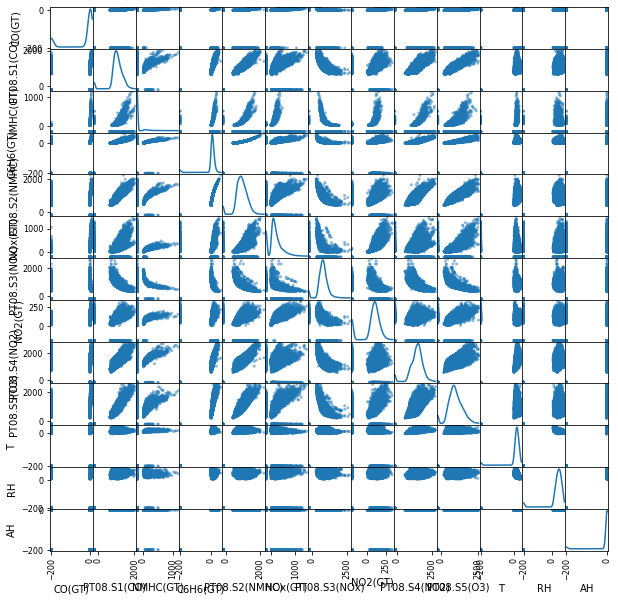

In [14]:
# scatter matrix of air quality 
pd.plotting.scatter_matrix(df_air,figsize=[10,10],diagonal='kde')


<div id="TODO5"></div>

### TODO5 (10 points)
1. Add your own plots (at least one) for each data that you think will provide some sort of insight into the data sets. Refer to prior labs if needed!
2. State your observations concerning your plots and why chose each plot. 


`TODO5.1` **Abalone**

<BarContainer object of 3 artists>

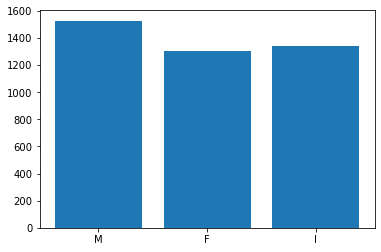

In [15]:

plt.bar(df_abalone['Sex'].unique(),[df_abalone.Sex[df_abalone.Sex=='M'].size,df_abalone.Sex[df_abalone.Sex=='F'].size,df_abalone.Sex[df_abalone.Sex=='I'].size])

`TODO5.2` **Observation**
This shows the distribution of the sexes which can skew the model if for example males on average live longer than females

`TODO5.1` **Air Quality**


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


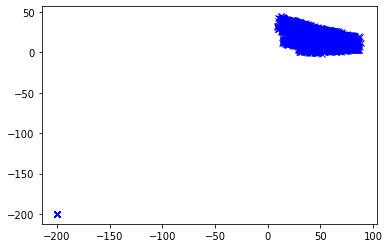

In [16]:
print(df_air.columns)
plt.plot(df_air['RH'],df_air['T'],'bx')

`TODO5.2` **Observation**
Their is a fairly strong corelation between temperature and relative humidity. There also is an extreme outlier at (-200,-200)



### Taking a closer look at data distributions 

Let's take a closer look at the data distributions. Here we'll group our features together into groups with common qualities. The first group will be shell weights consisting of 'Whole weight', 'Shucked weight', 'Viscera weight', and 'Shell weight'. The second group will be shell dimensions consisting of  'Length', 'Diameter', and 'Height'. The third group will simply be shell rings which corresponds to the 'Rings' column. For now, we'll ignore the 'Sex' column as it currently contains categorical variables.

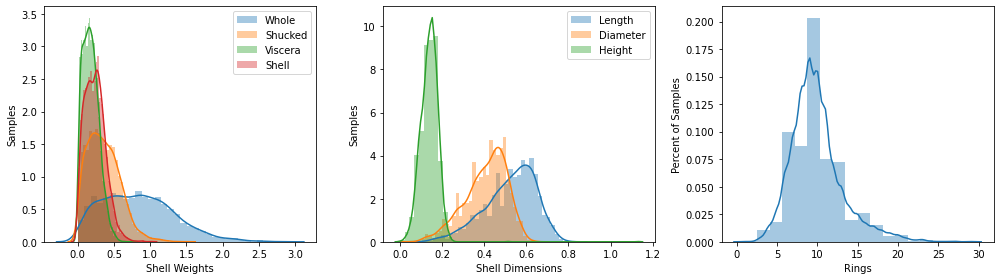

In [17]:
# codes from https://charlesreid1.github.io/circe/Abalone%20-%20Exploring%20the%20Data.html
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot weight information
sns.distplot(df_abalone['Whole weight'],   label='Whole',   ax=ax1)
sns.distplot(df_abalone['Shucked weight'], label='Shucked', ax=ax1)
sns.distplot(df_abalone['Viscera weight'], label='Viscera', ax=ax1)
sns.distplot(df_abalone['Shell weight'],   label='Shell',   ax=ax1)
ax1.legend()
ax1.set(xlabel='Shell Weights', ylabel='Samples')

# Plot dimension information
sns.distplot(df_abalone['Length'],   label='Length', ax=ax2)
sns.distplot(df_abalone['Diameter'], label='Diameter', ax=ax2)
sns.distplot(df_abalone['Height'],   label='Height', ax=ax2)
ax2.legend()
ax2.set(xlabel='Shell Dimensions', ylabel='Samples')

# Plot system response
sns.distplot(df_abalone['Rings'], bins=18, ax=ax3)
ax3.set(ylabel='Percent of Samples')
plt.tight_layout()

In the first two graphs we can see how each groups' feature distributions overlap. Recall, that for a data distribution the y-axis represents the number of samples or percent of samples and the x-axis represents the actual feature values.

Looking at the shell weights group plot we can see that most of the feature values are clustered between 0 and 1. However, it does seem that the 'Whole weight' feature has quite a broader distribution. 

The same idea applies to the feature grouping of shell dimensions. We can observe here that the 'Diameter' and 'Height' features do overlap some. Meanwhile, 'Height' seems to be concentrated around the value of .1.

Lastly lets take a look at the ring feature distribution graph to see if it will make a good target. Here we can see that shells with 5 rings only make up 2% of the data samples, while shells with 10 rings make up 20% of the data samples. Typically, we want all our targets to have the same number of data samples, or close to the same number, so our algorithm isn't biased towards a target that has more data samples. Let's take a closer look to see how biased our results might be if we use the ring feature as our target.

### Taking a closer look at our rings feature

Let's take a closer look at the rings feature by printing out the total number of data samples for each of our ring counts. 

Here we extract and visualize our unique ring values.

In [18]:
np.sort(df_abalone['Rings'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29], dtype=int64)

Now we print out 'Ring' column and the number of samples each value has by using the Pandas DataFrame `value_count()` method. Notice how `value_count()` has already sorted our data in descending order according to the number of samples per each unique ring value. 

In [19]:
df_abalone['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Wow, above we can confirm that the ring data distribution is quite spread, as previously observed. In fact, our ring feature data distribution is so spread some ring counts only contain 1 data sample! This is good sign that if we use the ring feature as our target, then our model will be biased towards rings counts that have many samples. For instance, our algorithm will be more likely to predict ring counts of 9, 10, and 8 because it will have seen way more of their samples.

What if we only look at ring counts which have over 100 samples? Will truncating our ring targets lessen the bias? Let's see!

In [20]:
more_than_100_samples = df_abalone['Rings'].value_counts() > 100
df_abalone['Rings'].value_counts()[more_than_100_samples]

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: Rings, dtype: int64

Welp, this gives us 11 target classes now. Still the spread of data distribution is high and thus the bias is still their. Typically, in this scenario we have to compensate for our imbalanced by changing the data or adjusting our algorithm to account for the bias. If we wanted to account for data imbalance at the level of our data we could downsample or upsample our data. Likewise, if we want to account for bias at the level of the algorithm we could apply some form of algorithmic weighting to emphasis minority classes. We'll just quickly elaborate on downsampling and upsampling as it is the most straightforward.

Downsampling means we randomly sample, samples from each target. The amount in which we sample corresponds to the target with the least amount of samples. For instance, our target with the least amount of samples is the ring count of 15 here. This means we would downsample the rest of targets to only have 103 samples.

Upsampling applies the same idea but in the reverse direction. Once again we randomly sample, samples from each target. The amount in which we sample now corresponds to the target with the most samples. Here our target with the most samples is the ring count of 9. This means we upsample the rest of our targets to have 689 samples. In practice, we duplicate the samples or augment existing samples of targets that have lower sample counts until they reach the desired sample count.

Both of these data compensation methods have their pros and cons. However, accounting for a imbalanced and bias data is out of scope for this lab. Let's instead choose a much easier classification feature like 'Sex'! If you have any questions about dealing with imbalanced and biased datasets feel free to ask!

# Classification of Abalone




## Data Partitioning

Let us prepare train and test data first.

<div id="TODO6"></div>

### TODO6 (5 points)

1. Partition `df_abalone` and store to `X_train`, `X_test`, `t_train`, and `t_test`.

  * Note the target label we classify is `Sex` of Abalone. **Be sure not to include the label in the input!**

In [21]:
df_abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [39]:
# train and test split 
from sklearn.model_selection import train_test_split
X=df_abalone.drop('Sex',axis=1)
T=pd.factorize(df_abalone_num.Sex)[0]
T[T >= 1] = -1
T[T == 0] = 1
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2)
print(X.shape, X_train.shape, X_test.shape, t_train.shape, t_test.shape)

(4177, 8) (3341, 8) (836, 8) (3341,) (836,)


<div id="TODO7"></div>

### TODO7 (5 points)

1. Create a logistic regression model.  
2. Train the model and compute the train and test accuracy.

NOTE: Refer to the previous labs if you don't remember what object instance to create and how to do the rest.

We can validate our method work by checking the number of unique targets in `t_train`. As we can see there are now only two targets. One represents our negative class (target equal to -1) which corresponds to versicolor and virginica. The other represents our positive class (target equal to 1) which corresponds to setosa.

In [40]:
# TODO: import modules that you need 

from sklearn.linear_model import LogisticRegression

# TODO: create logistic regression instance
logreg = LogisticRegression()



# TODO: train the model
logreg.fit(X_train, t_train)

# TODO: evaluate train & test accuracy
train_score = logreg.score(X_train,t_train)
test_score = logreg.score(X_test,t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))



Train Accuracy: 0.637832984136486, Test Accuracy: 0.6327751196172249


<div id="TODO8"></div>

### TODO8 (5 points)

Now, let us plot the results and see how much of test misses we have. 

1. Compute the predictions for test data `X_test`.
2. Sort the `t_test` with `argsort` in Numpy.
3. Using the sorted index, present the target label (in red line) and predictions (blue dots).


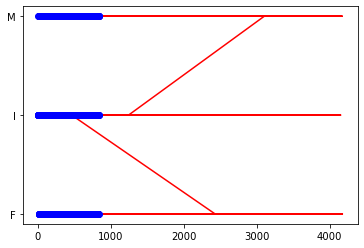

In [36]:

# TODO 1
predict=logreg.predict(X_test)

# TODO 2

sortT=np.argsort(t_test)
sortT=t_test.iloc[sortT]

# TODO 3
plt.plot(sortT,'r-')
plt.plot(predict,'bo')
plt.show()




## Classification Evaluation

Let us benchmark the classifiers that we have leraned using evaluation metircs.


<div id="TODO9"></div>

### TODO9 (10 points)

We will try logistic regression, kNN, and Naive Bayes for evaluation.  **Hint: This is very similar to what we did last week!**

1. Import all the necessary modules such as classifiers (including preprocessing modules) and metric modules. 
2. Create instances for the three classifiers. 
3. In the loop, 
  1. train and make predictions for test and store it as `y_test`
  2. Compute the train/test accuracy and print 
  3. Print the sklearn `matthews_corrcoef` or MCC using the test data.
  4. Print sklearn `classificaiton_report` metrics using the test results.
  5. Plot the sklearn `confusion_matrix` with the sklearn `ConfusionMatrixDisplay` class using the test data.
4. Compare and discuss results. 

In [41]:
# TODO 1

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Logistic Reg
Train Accuracy: 0.637832984136486, Test Accuracy: 0.6327751196172249
MCC:0.12575214443660324
Classification Report:               precision    recall  f1-score   support

          -1       0.65      0.91      0.75       521
           1       0.54      0.18      0.27       315

    accuracy                           0.63       836
   macro avg       0.59      0.54      0.51       836
weighted avg       0.61      0.63      0.57       836

kNN
Train Accuracy: 0.7488775815624065, Test Accuracy: 0.631578947368421
MCC:0.17553860655947268
Classification Report:               precision    recall  f1-score   support

          -1       0.68      0.79      0.73       521
           1       0.52      0.37      0.43       315

    accuracy                           0.63       836
   macro avg       0.60      0.58      0.58       836
weighted avg       0.62      0.63      0.62       836

Naive Bayes
Train Accuracy: 0.622568093385214, Test Accuracy: 0.6076555023923444
MCC:0.2215536584

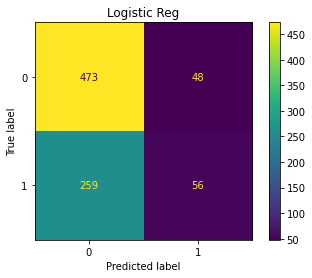

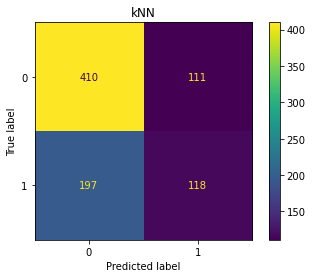

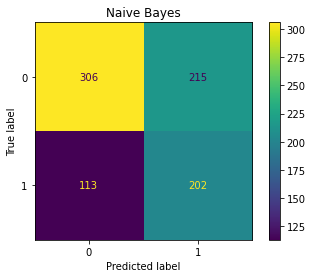

In [42]:
# TODO 2
logreg = LogisticRegression()
knn = KNeighborsClassifier()
nb = naive_bayes.GaussianNB()

# list of algorithms to test
models = [ logreg, knn, nb]
# list of algorithm names 
names = ["Logistic Reg", "kNN", "Naive Bayes"]


for name, model in zip(names, models):
    print(name)
    
    # TODO 3.A

    model.fit(X_train,t_train)
    y_test=model.predict(X_test)
    
    #### 
    # TODO 3.B
    train_score = model.score(X_train,t_train)
    test_score = model.score(X_test,t_test)
    print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))
    
    # TODO 3.C
    print('MCC:'+str(matthews_corrcoef(t_test,y_test)))
    # TODO 3.D

    print('Classification Report:',classification_report(t_test,y_test))
    # TODO 3.E
    cm = confusion_matrix(t_test, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot() 
    
    
    plt.title(name)


`TODO9.4` What do you think about the difference between the classifiers in the Abalone dataset? Which one works best?

`ANSWER` Overall I believe KNN seems to work the best.

# Predicting Air Quality





## Data Partitioning


Air quality data contain multiple ground truth (GT) columns so we may want split them first then partition.
Let us do it. 

<div id="TODO10"></div>

### TODO10 (10 points)

1. Split the columns (2,4,5,7,9) for target dataframe `df_air_T` and the rest for data dataframe `df_air_X`. 
1. Partition `df_air` and store to `X_train`, `X_test`, `t_train`, and `t_test`.

  * NOTE: the target we predict are the columns with GT's

In [43]:
D = df_air.shape[1]
target_i = [2,4,5,7,9]   # target index

# TODO: get data index - drop the date and time
data_i = [3,6,8,10,11,12,13,14]

# display target and input
df_air_T = df_air.iloc[:, target_i]
df_air_X = df_air.iloc[:, data_i]
display(df_air_X)
display(df_air_T)

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...
9352,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,150.0,11.9,166.0,113.0
1,2.0,112.0,9.4,103.0,92.0
2,2.2,88.0,9.0,131.0,114.0
3,2.2,80.0,9.2,172.0,122.0
4,1.6,51.0,6.5,131.0,116.0
...,...,...,...,...,...
9352,3.1,-200.0,13.5,472.0,190.0
9353,2.4,-200.0,11.4,353.0,179.0
9354,2.4,-200.0,12.4,293.0,175.0
9355,2.1,-200.0,9.5,235.0,156.0


In [44]:
df_air.shape 

(9357, 15)

In [45]:
# TODO2: partitioning

X_train, X_test, t_train, t_test = train_test_split(df_air_X, df_air_T, test_size=0.2)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (7485, 8)
Train target shape: (7485, 5)
Test data shape: (1872, 8)
Test target shape: (1872, 5)



# Regression Evaluation

How well can the regression models work on the air quality data? Let us test it by applying different regularization penalty. 

<div id="TODO12"></div>


### TODO12 (10 points)

1. Import all the linear models and evaluation functions. 
  * Hint: see the `names` and `eval_names` to find what models and metrics are used. 
1.  Create your own list of models to be used for regression and store them into the `models` variables, referring the list of names in the variable `names`.

2. Pick your own regularization parameter values. It is OK to put any arbitrary number. 
  * Don't be bother to optimize the model yet. We will learn how to optimize the hyperparameters later. 

3. `fit` the model and make `predict`ion for `X_test` and store as `y_test`. 
3. Fill in the `results` list with the corresponding score computations to the `eval_names`. 

6. State your observation of the comparision. 

In [46]:
# TODO 1

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
simplefilter(action='ignore')

lr= LinearRegression
ridge=Ridge
lasso=Lasso
elastic=ElasticNet

# TODO 2
models = [lr,ridge,lasso,elastic]
names = [ 'LeastSq', 'Ridge', 'Lasso', 'Elastic']


# iterate through each target
for col in df_air_T.columns:
    eval_names = [
            "R2",
            'max_err',
            "MAE",
            "MAPE",
            "MSE"
        ]
    print("Predicting ", col)
    print("\t\t{}\t{}\t{}\t{}\t{}".format(*eval_names))
    for i, name in enumerate(names):

        print(name, end="\t\t")

        # TODO 3 
        init_params = {}
        if name == names[1]:
            init_params['alpha'] = .1
        if name == names[2]:
            init_params['alpha'] = .1
        elif name == names[3]:
            init_params['alpha'] = .1
            init_params['l1_ratio'] = .1

        model = Pipeline([('scaler', StandardScaler()),
                           ('regr', models[i](**init_params))])

       
        # TODO 4
        model.fit(X_train,t_train[col])
        y_test=model.predict(X_test)
        
        ##### evaluate

        
        # TODO 5
        results = [
            r2_score(t_test[col],y_test),
            max_error(t_test[col],y_test),
            mean_absolute_error(t_test[col],y_test),
            mean_absolute_percentage_error(t_test[col],y_test),
            mean_squared_error(t_test[col],y_test)
        ]

        # print out the metrics
        print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(*results))

    

Predicting  CO(GT)
		R2	max_err	MAE	MAPE	MSE
LeastSq		0.04	200.58	56.04	28.61	5491.38
Ridge		0.04	200.55	56.04	28.61	5491.31
Lasso		0.05	205.57	56.05	28.60	5487.99
Elastic		0.04	198.37	56.64	28.41	5493.25
Predicting  NMHC(GT)
		R2	max_err	MAE	MAPE	MSE
LeastSq		0.29	736.69	67.88	0.39	11560.60
Ridge		0.29	736.53	67.82	0.39	11555.81
Lasso		0.29	734.56	66.72	0.38	11483.54
Elastic		0.20	842.03	60.90	0.39	13000.42
Predicting  C6H6(GT)
		R2	max_err	MAE	MAPE	MSE
LeastSq		1.00	10.87	0.84	0.26	1.46
Ridge		1.00	10.87	0.84	0.26	1.46
Lasso		1.00	11.39	0.92	0.30	1.71
Elastic		0.99	17.99	2.28	0.53	8.98
Predicting  NOx(GT)
		R2	max_err	MAE	MAPE	MSE
LeastSq		0.50	1103.08	125.16	0.94	33498.04
Ridge		0.50	1102.09	125.16	0.94	33497.17
Lasso		0.50	1072.37	125.26	0.94	33487.16
Elastic		0.47	1045.99	129.24	0.85	35315.71
Predicting  NO2(GT)
		R2	max_err	MAE	MAPE	MSE
LeastSq		0.20	384.90	82.71	0.70	12474.14
Ridge		0.20	384.91	82.71	0.70	12474.17
Lasso		0.20	385.12	82.68	0.69	12485.05
Elastic		0.19	370.68	83.80

`TODO12.6` Do you observe any difference? What do you think about the results? 

`ANSWER` overall all models scored roughly the same except elastic which scored worse

# Cross Validation

One test results do not give you confident report of the performance of the models. 
As the partitioning can be biased. To avoid this, we often report cross validation error than just one test accuracy as above. Pick your best model aboev and recompute the cross validation perofrmance of it. 



<div id="TODO13"></div>


### TODO13 (8 points)

Let us repeat from the partitioning data to reset some of our variables. 

1. Partition the `df_abalone` and store to `X_train`, `X_test`, `t_train`, and `t_test`. 
2. Create ONE classifier of your own choice. 
3. Cross-validate your model by using `cross_val_score` with 10 fold (`cv=10`). 
4. Print out the mean and standard devision of the CV scores. 
5. State what you observed. 

In [47]:
# TODO: import the proper module here 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# TODO 1
X=df_abalone.drop('Sex',axis=1)
T=df_abalone.Sex

X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2)
# TODO 2
model=LogisticRegression()


# TODO 3
cv=cross_val_score(model,X_train,t_train,cv=10)

# TODO 4
print(cv.mean(),cv.std())


0.5600142997586917 0.02255454768350047


`TODO13.5` What do you think about the CV error? Do you observe any difference from the previous metrics?

`ANSWER` overall the cross validation matches similarly with what i observed above for logistic regression

Let us repeat the same for the Air Quality regression. 

<div id="TODO14"></div>


### TODO14 (5 points)

In the given loop for the five targets, 

1. Partition the `df_air_X` and `df_air_T`, and store to `X_train`, `X_test`, `t_train`, and `t_test`. 
2. Create ONE regressor of your own choice. 
3. Cross-validate your model by using `cross_val_score` with 10 fold (`cv=10`). 
4. Print out the mean and standard devision of the CV scores. 
5. State what you observed. 

In [48]:
# for each target

for col in df_air_T.columns:

    print(col, end="  \t")
    # TODO 1
    X_train, X_test, t_train, t_test = train_test_split(df_air_X, df_air_T, test_size=0.2)
    # TODO 2
    lr=LinearRegression()
    
    
    # TODO 3
    cv=cross_val_score(lr,X_train,t_train[col],cv=10)
    # TODO 4
    print(cv.mean(),cv.std())
    

CO(GT)  	0.054823687990421734 0.013304977769580303
NMHC(GT)  	0.3093976176794291 0.033641790858171094
C6H6(GT)  	0.9991725846722346 0.0001722949275797229
NOx(GT)  	0.5022291599855058 0.023837303479387274
NO2(GT)  	0.20282502430378146 0.031516099345084495


`TODO14.5` What do you think about the CV error? Do you observe any difference from the previous metrics?

`ANSWER` overall the cv errors are significantly different than what i observed above. This could speak to the corelation within the data

<div id="TODO18"></div>

## Feedback (2 point)

Did you enjoy the lab? 

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER`5

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER` overall medium dificulty

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER` all concepts explained well